In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('fact_survey_responses.csv')
data2 = pd.read_csv('dim_repondents.csv')
data3 = pd.read_csv('dim_cities.csv')

In [3]:
# # Applying a condition using df.where()
# condition = data1['Consume_time'] == 'To stay awake during work/study'
# data1.where(condition).count()['Consume_frequency']\

In [4]:
dff = pd.merge(data1, data2 , on = 'Respondent_ID')

In [5]:
df = pd.merge(dff, data3, on = 'City_ID')

In [6]:
df.head(2)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103025,120055,Once a week,Before exercise,To enhance sports performance,Yes,Neutral,Effective,Yes,3,...,No,Above 150,Gyms and fitness centers,Studying/working late,Umang Sarkar,31-45,Non-binary,CT117,Ahmedabad,Tier 2


# Primary Insights

##  Demographic Insights

## 1. Who prefer drink more energy drink(Male/Female/Non-Binary)?

<Axes: xlabel='Gender'>

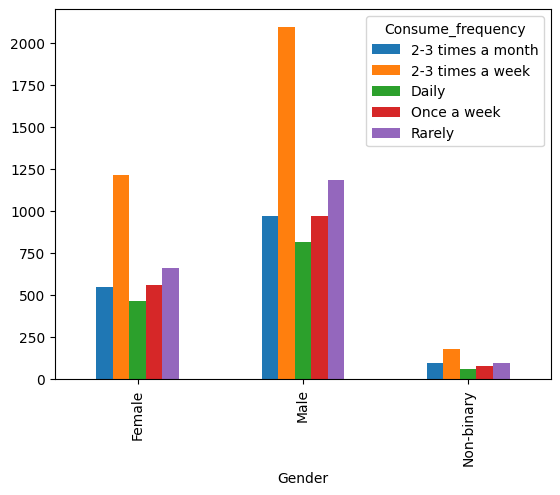

In [7]:
pd.crosstab(df.Gender,df.Consume_frequency).plot(kind = 'bar')

Observations from the above chart :-

1. Here we can cleary see that male is prefering more energy drink than any other gender.
2. Male are prefering enegy drink 2-3 times a week.

## 2. Which age group prefer to drink the most?

<Axes: xlabel='Age'>

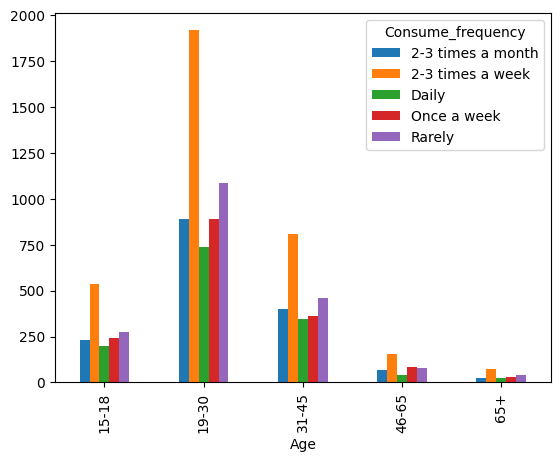

In [8]:
pd.crosstab(df.Age,df.Consume_frequency).plot(kind = 'bar')

Observations from the above chart :-

    1. Here we can see that the Age group 19-30 is consuming the highest amount of the energy drink.
    2. This age groups also prefers to consume energy drink 2-3 times a week.

## 3. Which type of marketing reaches the most Youth (15-30)?

In [9]:
# Applying a condition using df.where()

# for single condition
# df_age = df[df['Age'] == '15-18']

# for multple conditions
df_young = df[(df['Age'] == '15-18') | (df['Age'] == '19-30')]

<Axes: xlabel='Age'>

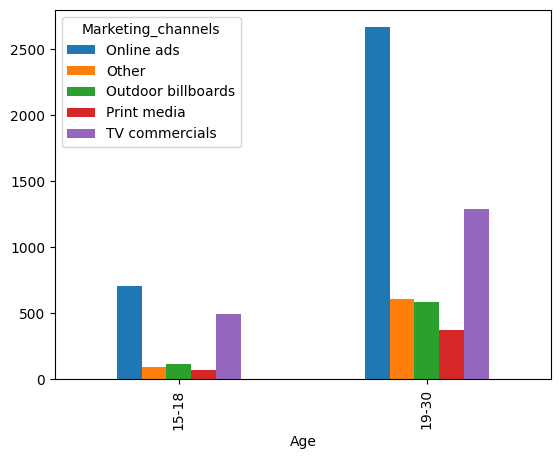

In [10]:
pd.crosstab(df_young.Age,df_young.Marketing_channels).plot(kind = 'bar')

Observations from the above chart :-
    
    1. Here we can see that the online ads are the most approaching marketing chaanel.
    2. The age group 19-30 has targeted most by the marketing channels.
    3. We can simply avoid (Outdoor billboards/print media & other) ways to market as it doesn't create any significant       effects. So we can say that to target the age group of 15-30 yr old audience we can mostly rely on ONLINE ADs & TV Commercials.

![Image Description](1.png)

## Consumer Preferences:

## 1. What are the preferred ingredients of energy drinks among respondents?

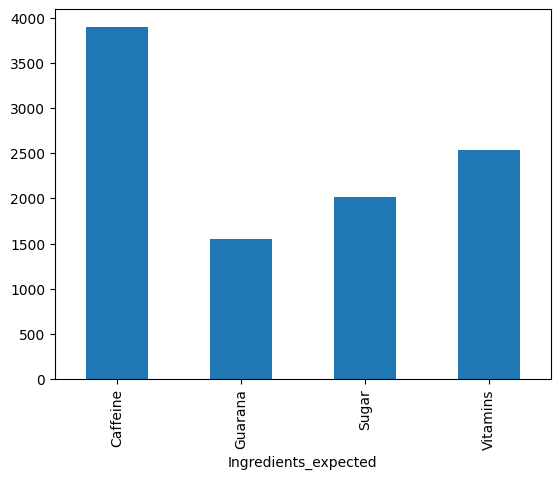

In [11]:
a = df.groupby('Ingredients_expected').Ingredients_expected.count().plot(kind = 'bar')
plt.show()

Observations from the above chart :-
    
    1. Here we can clearly see that caffeine is the most preffered ingredients by therespondents.
    2. We should focus more on caffeine addition in the drinks.

## 2. What packaging preferences do respondents have for energy drinks?

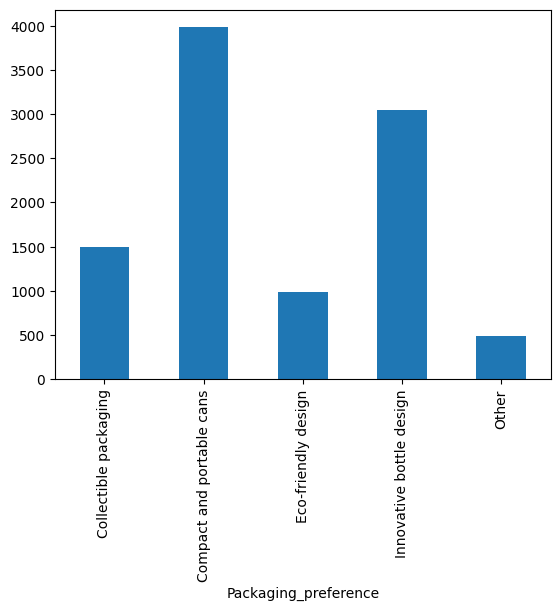

In [12]:
a = df.groupby('Packaging_preference').Ingredients_expected.count().plot(kind = 'bar')
plt.show()

In [13]:
df.groupby('Packaging_preference').Packaging_preference.count()

Packaging_preference
Collectible packaging        1501
Compact and portable cans    3984
Eco-friendly design           983
Innovative bottle design     3047
Other                         485
Name: Packaging_preference, dtype: int64

Observations from the above chart :-
    
    1. People are prefering compact portable cans and Innovative bottle design as packaging more than any other packaging techniques.
    2. Brand can discontinue eco friendly design anf other packaging preferences or It can come up with more innovative ideas in Eco-friendly design.

![Image Description](2.png)

## Competition Analysis:


## 1. Who are the current market leaders?

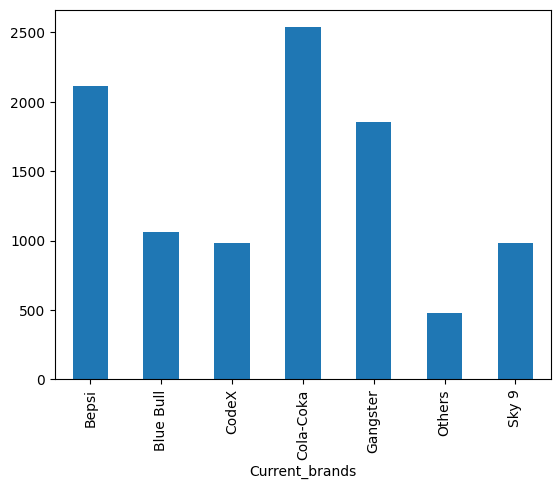

In [14]:
df.groupby('Current_brands').Consume_frequency.count().plot(kind='bar')
plt.show()

Observations from the above chart :-

1. As we can clearly see that some companies like (Cola-Coka/Bepsi/Gangster) are the current market leaders.
2. At the other hand companies like (Blue Bull/Sky 9) are quite similar in terms of market share as our brand.

## 2. What are the primary reasons consumers prefer those brands over ours?

<Axes: xlabel='Current_brands'>

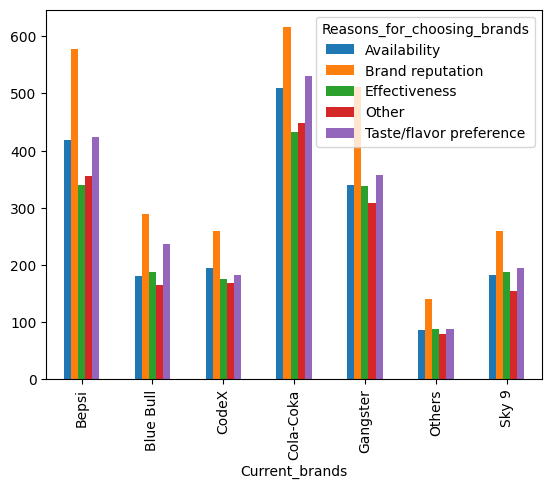

In [15]:
a = df.Current_brands
b = df.Reasons_for_choosing_brands
pd.crosstab(a,b).plot(kind='bar')

Observations from the above chart :-
    
after seeing this chart one can clearly say that the comapanies that hold the majority market share has three common factors that plays an mportant role when customer is buing energy drink :-

        a. Brand Reputation
        b. Taste/Flavour
        c. Availablity

![Image Description](3.png)

## Marketing Channels and Brand Awareness:

## 1. Which marketing channel can be used to reach more customers?

In [16]:
# to get total percentage of marketing methods that people were approached with.
df.Marketing_channels.value_counts() / df.Marketing_channels.value_counts().sum() * 100

Marketing_channels
Online ads            40.20
TV commercials        26.88
Outdoor billboards    12.26
Other                 12.25
Print media            8.41
Name: count, dtype: float64

The marketing channel effects on overall responses

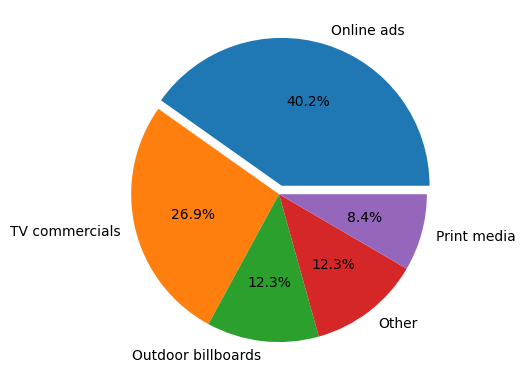

In [17]:
counts = df.Marketing_channels.value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode = [0.06, 0, 0, 0, 0])
plt.show()

The marketing channel effects on responses for only our brand 'CodeX'

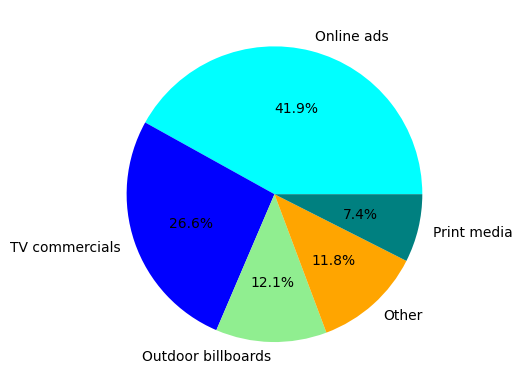

In [18]:
df_codeX = df[(df.Current_brands == 'CodeX')]
A = df_codeX.Marketing_channels.value_counts()
plt.pie(A, labels= A.index, autopct = '%1.1f%%', colors = ['aqua','blue','lightgreen','orange','teal'])
plt.show()

## 2. How effective are different marketing strategies and channels in reaching our customers?

In [19]:
df_heard = df[(df.Heard_before == 'Yes')]

In [20]:
dff = df_heard[(df_heard.General_perception == 'Effective') | (df_heard.General_perception == 'Healthy')]

In [21]:
market = df.Marketing_channels
image = df.General_perception
loc = df.Purchase_location
trial = df.Tried_before

<Axes: xlabel='Marketing_channels'>

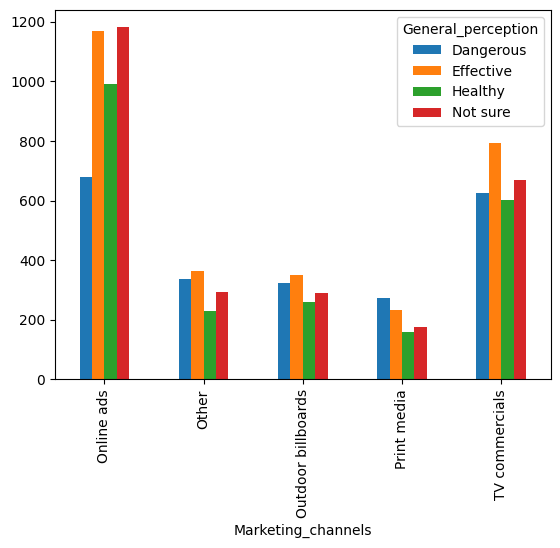

In [22]:
pd.crosstab(market,image).plot(kind = 'bar')

Observation :

1. The most effective way to market and establish a good General Perception for brand among audience is "Online Ads".
2. TV commercials at the other hand is somehow performing decent in establishing a good General Perception of brand among audience but number of people having bad perception from TV commercials are equal to Online Ads that means its not that great.
3. But Print media, Outdoor billboards and other marketing channels are bad approaches in building a good General Perception of brand among audience.


<Axes: xlabel='Marketing_channels'>

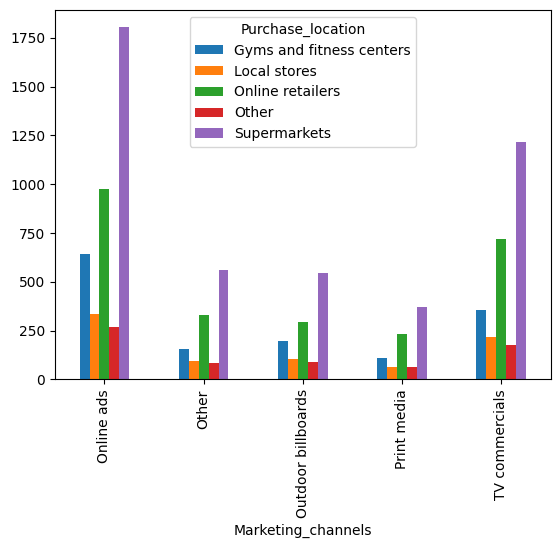

In [23]:
pd.crosstab(market,loc).plot(kind = 'bar')

Observation :
    
    1. Our product should be placed more in Supermarkets, Online retailers & Gyms and fitness center because that is driving most of the crowd and consumers. through the marketing channels like ('Online Ads','TV commercials')

Final Observation :
    1. Our best marketing strategy for more growth is to maeket our brand more on Online Platforms and TV commercials with great ambassadors.
    2. The majority product placments should be in areas like Supermarkets, Gyms & fitness center and online stores.

![Image Description](4.png)

## Brand Penetration:

## 1. What do people think about our brand? (overall rating)

In [24]:
df_code = df[(df.Current_brands == 'CodeX')]

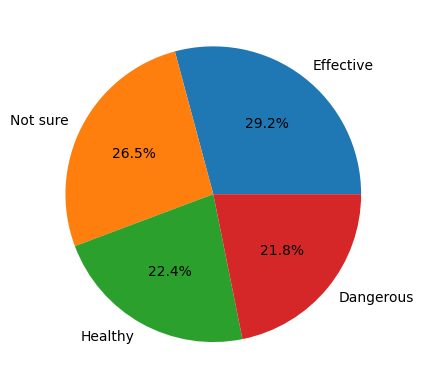

In [25]:
a = df_code.General_perception.value_counts()
plt.pie(a, labels = a.index, autopct = '%1.1f%%')
plt.show()

## 2. Which cities do we need to focus more on?

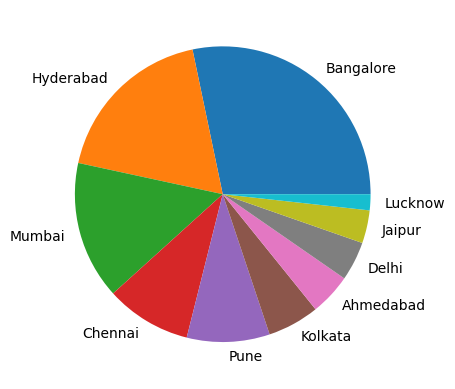

In [26]:
df_code = df[(df.Current_brands == 'CodeX') & (df.Heard_before == 'Yes') & (df.Tried_before == 'No')]
plt.pie(df.City.value_counts(), labels = df.City.value_counts().index)
plt.show()

Observation :
As per the above observation we can say that cities like Bangalore, Hyderabad,Mumbai, Chennai, Pune needs to get more brand awarness about CodeX. because here we can see that even after people heard about our brand they havn't tried it yet.

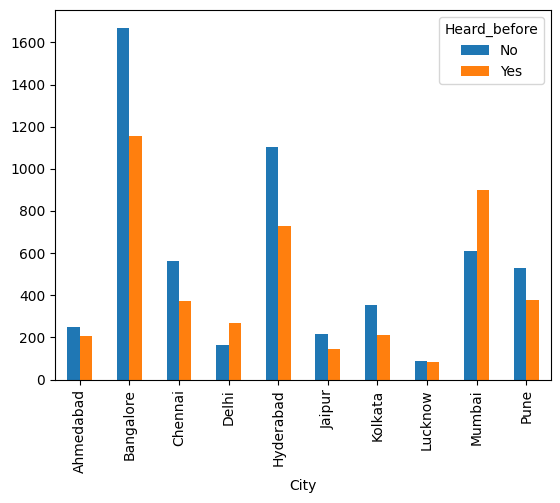

In [27]:
df_code = df[(df.Current_brands == 'CodeX')]
pd.crosstab(df.City, df.Heard_before).plot(kind = 'bar')
plt.show()

Observation :
As per the above observation we can say that cities like Bangalore, Hyderabad,Mumbai, Chennai, Pune needs to get more brand awarness about CodeX. because here number of people who have not heard more about it than those who have heard 

![Image Description](5.png)

## Purchase Behavior:

## 1. Where do respondents prefer to purchase energy drinks?


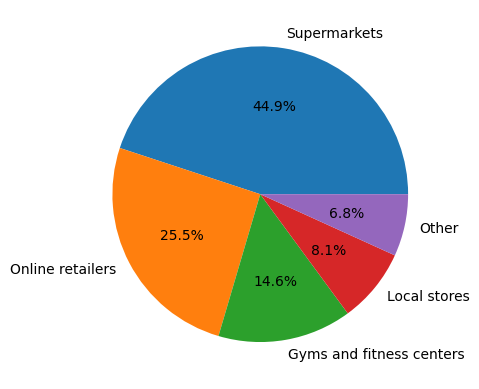

In [28]:
plt.pie(df.Purchase_location.value_counts(), labels = df.Purchase_location.value_counts().index, autopct = '%1.1f%%')
plt.show()

Observation :
    
    1. As we cam see majority of audience are buying from  Supermarkets, Gyms & fitness center and online stores.

## 2. What are the typical consumption situations for energy drinks among respondents?

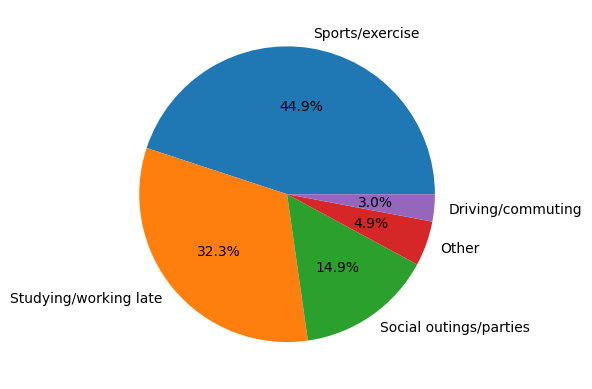

In [29]:
plt.pie(df.Typical_consumption_situations.value_counts(), labels = df.Typical_consumption_situations.value_counts().index, autopct = '%1.1f%%')
plt.show()

Observation : 
    
    1. As you can see from above pie chart that people prefer to drink more energy drink while doing sports/exercise, Studying/work late or doing any social outings/parties.

## 3. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

<Axes: xlabel='row_0'>

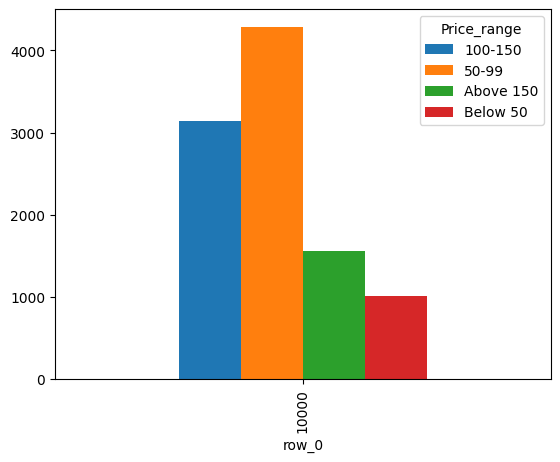

In [30]:
pd.crosstab(df.Consume_frequency.count(), df.Price_range).plot(kind = 'bar')

<Axes: xlabel='row_0'>

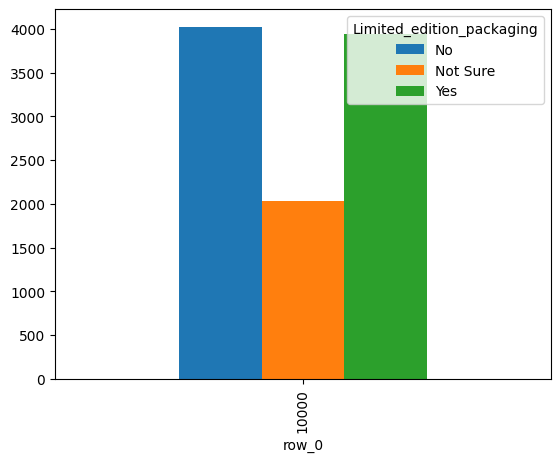

In [31]:
pd.crosstab(df.Consume_frequency.count(), df.Limited_edition_packaging).plot(kind = 'bar')

Observation :
    
    1. As you can see that a major affect on buying behaviour is from price range where people are willing to buy more when the price is between 50-150 rather than a higher price.
    2. Secondly we can also see that Limited Edition Packaging doesn't influence people for buying our product, even the number of people who doesn't ant the Limited Edition Packaging is slightly higher.

![Image Description](6.png)

## Product Development

## Which area of business should we focus more on our product development? (Branding/taste/availability)

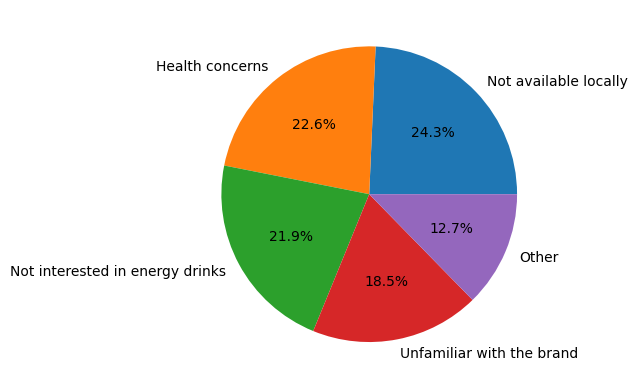

In [32]:
plt.pie(df.Reasons_preventing_trying.value_counts(), labels = df.Reasons_preventing_trying.value_counts().index, autopct = '%1.1f%%')
plt.show()

<Axes: xlabel='Improvements_desired'>

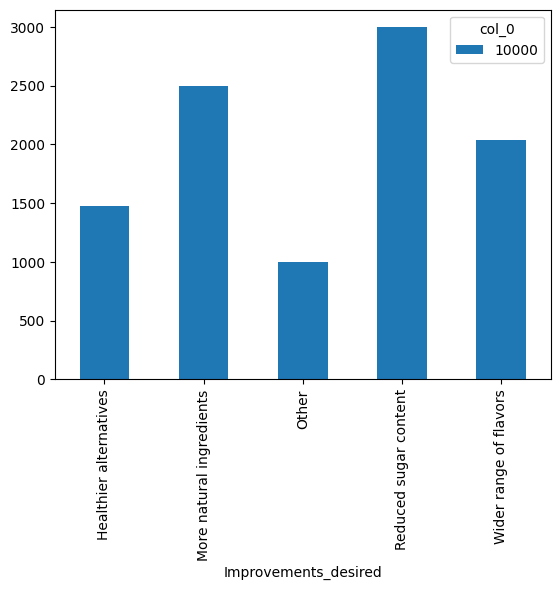

In [33]:
pd.crosstab(df.Improvements_desired,df.Consume_frequency.count()).plot(kind = 'bar')

Observations : As you can see in order to make our brand better there are several places where we need to fix things
    
    1. Availability = One of main improvement is to keep our supply chain active as we earlier talked that our majority 
    sales comes from Gyms, Super market but a less number was from local store, so it might be a reason that we should 
    build our local store supply chain more better so it can reach to those who wants to try it out.
    
    2. Health Concerns = Second thing that we need to work on is to add more of healthy ingredients into our drink, 
    more natural ingredient in out drink as well as keeping sugar content less in the drink.
    
    3. Brand Awarness = Third thing that you need to focus on is to do an active marketing through our highly 
    affective Marketing channels like Online Ads & TV commercials.
    
    4. Flavours = In the end we should introduce more familier and good flavour range in our drink.

![Image Description](7.png)

df.to_csv('Final_Data_CodeX.csv')